# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the dataset

In [2]:
df=pd.read_csv('Global_Superstore2.csv',encoding="latin-1")

# Data Preprocessing

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#### Check/Handle Numerical Columns

In [5]:
df.describe(exclude='object')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


###### ***Rounding Columns***

In [6]:
df['Sales']=round(df['Sales'],2)

In [7]:
df['Shipping Cost']=round(df['Shipping Cost'],2)

In [8]:
df['Discount']=round(df['Discount'],2)

In [9]:
df['Quantity']=round(df['Quantity'],2)

In [10]:
df['Profit']=round(df['Profit'],2)

In [11]:
df['Row ID']=round(df['Row ID'])

###### ***Check for negative values***

In [12]:
df.loc[df['Sales'] < 0,'Sales']

Series([], Name: Sales, dtype: float64)

In [13]:
df.loc[df['Shipping Cost'] < 0,'Shipping Cost']

Series([], Name: Shipping Cost, dtype: float64)

In [14]:
df.loc[df['Discount'] < 0,'Discount']

Series([], Name: Discount, dtype: float64)

In [15]:
df.loc[df['Quantity'] < 0,'Quantity']

Series([], Name: Quantity, dtype: int64)

In [16]:
df.loc[df['Row ID'] < 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [17]:
df.loc[df['Profit'] < 0,'Profit']

1        -288.76
3         -96.54
9       -1862.31
30       -148.46
32       -350.49
          ...   
51276      -4.47
51278      -6.46
51279     -21.17
51280     -49.57
51286      -1.11
Name: Profit, Length: 12540, dtype: float64

In [18]:
df['Profit']=abs(df['Profit'])

###### ***Handle/Check Date format***

In [19]:
df.describe(exclude='int')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Profit,Shipping Cost,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,...,13,10292,3,17,3788,NaN,NaN,NaN,NaN,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,...,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,...,11117,35,31273,6152,227,NaN,NaN,NaN,NaN,29433
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,246.490577,0.142883,64.510624,26.375915,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,487.565367,0.212285,164.473967,57.296804,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.440000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.762500,0.000000,6.300000,2.610000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,85.055000,0.000000,18.620000,7.790000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,251.055000,0.200000,57.240000,24.450000,NaN


#### ***We have 4 unique ship modes,1590 unique customers,795 unique customer names,3636 unique cities,1094 states,147 countries,13 regions,3 categories,17 sub categories, and 3788 product names***

In [20]:
df.groupby('Customer ID')['Customer Name'].unique().sort_values()

Customer ID
AB-10015         [Aaron Bergman]
AB-15            [Aaron Bergman]
AH-10030         [Aaron Hawkins]
AH-30            [Aaron Hawkins]
AS-10045        [Aaron Smayling]
                    ...         
YC-21895        [Yoseph Carroll]
ZC-11910      [Zuschuss Carroll]
ZC-21910      [Zuschuss Carroll]
ZD-11925    [Zuschuss Donatelli]
ZD-21925    [Zuschuss Donatelli]
Name: Customer Name, Length: 1590, dtype: object

#### ***Create Proper Date Format***

In [21]:
df['Order Date']=pd.to_datetime(df['Order Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_7504\1722919639.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date']=pd.to_datetime(df['Order Date'])


In [22]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_7504\647966420.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date']=pd.to_datetime(df['Ship Date'])


#### ***Create Year & Month columns***

In [23]:
df['Year']=df['Order Date'].dt.year

In [24]:
df['Month']=df['Order Date'].dt.month

#### ***Drop Unused Columns***

In [25]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Year', 'Month'],
      dtype='object')

In [26]:
df.drop(columns=['Discount','Postal Code','Profit'],inplace=True)

In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Shipping Cost', 'Order Priority',
       'Year', 'Month'],
      dtype='object')

#### ***Create New Sales Column***

In [28]:
df['sales']=df['Sales']*df['Quantity']

In [29]:
df.drop(columns=['Sales'],inplace=True)

In [30]:
df.columns=['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'states', 'country',
       'markets', 'regions', 'product_id', 'categories', 'sub_categories',
       'product_name','quantities','freightcost', 'order_priority','years','months','sales']

In [31]:
from pathlib import Path  # doctest: +SKIP
filepath = Path(r'C:\Users\User\Downloads\SQL\PROJECTS\Global_Superstore.csv')  # doctest: +SKIP
filepath.parent.mkdir(parents=True, exist_ok=True)  # doctest: +SKIP
df.to_csv(filepath,columns= ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'states', 'country',
       'markets', 'regions', 'product_id', 'categories', 'sub_categories',
       'product_name','quantities','freightcost', 'order_priority','years','months','sales'],header= True,
        index = False)  # doctest: +SKIP

In [32]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,states,...,product_id,categories,sub_categories,product_name,quantities,freightcost,order_priority,years,months,sales
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,7,933.57,Critical,2012,7,16167.55
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",9,923.63,Critical,2013,2,33384.60
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",9,915.49,Medium,2013,10,46576.53
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",5,910.16,Medium,2013,1,14462.55
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",8,903.04,Critical,2013,11,22663.68


# Data Exploration

### *Sales Analysis*

In [33]:
print(f"Total Sales = ",round(df['sales'].sum()))

Total Sales =  61821273


In [34]:
df.groupby('years')['sales'].sum().sort_values(ascending=False)

years
2014    20985813.26
2013    16743659.74
2012    12962194.38
2011    11129605.66
Name: sales, dtype: float64

##### ****Sales have increased in each of the operating years.****

In [35]:
df.groupby(['years','months'])['sales'].sum().sort_values(ascending=False).unstack()

months,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
2011,456777.48,486085.21,720105.61,569976.56,744481.49,1011595.57,534383.77,1066876.75,1459913.85,945367.16,1506170.82,1627871.39
2012,689409.50,485020.55,827919.59,781149.31,991665.45,1092075.21,707845.08,1562379.10,1395052.92,1219309.74,1521473.79,1688894.14
2013,1029843.47,885854.55,967035.72,796720.09,1278264.28,2041529.22,1099702.95,1540457.52,1770230.79,1405957.12,1816303.28,2111760.75
2014,1230117.55,858251.86,1245819.08,1171706.12,1334220.16,1995769.92,1233009.10,2218194.12,2395032.96,2128268.40,2686614.32,2488809.67


##### ****The last four Months of 4 months of the year are typically the busiest period. The exception is June where Sales spike,but then fall the following month.****

In [36]:
current_df=df.groupby('years')['sales'].sum()

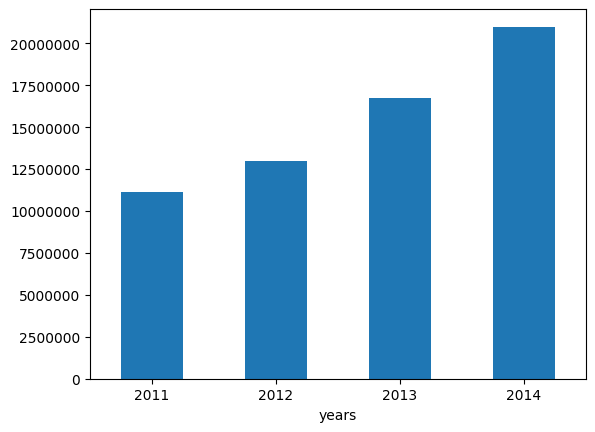

In [37]:
fig, ax = plt.subplots()
current_df.plot(kind='bar',x='sales',y='years',ax=ax)
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.show()

In [38]:
prev_df=current_df.shift(1)

In [39]:
YOY=round((current_df-prev_df)/prev_df,2)*100

In [40]:
YOY

years
2011     NaN
2012    16.0
2013    29.0
2014    25.0
Name: sales, dtype: float64

##### ****The sales have increased by 16%,29% and 25% since inception. There was a slight decrease from 2013 to 2014 of 4%. But overall it has been generally significant growth****

In [41]:
curm_df=df.groupby(['years','months'])['sales'].sum()

In [42]:
prevm_df=curm_df.shift(1)

In [43]:
MoM=round((curm_df-prevm_df)/prevm_df,2)*100

In [44]:
MoM.unstack()

months,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
2011,NaN,6.0,48.0,-21.0,31.0,36.0,-47.0,100.0,37.0,-35.0,59.0,8.0
2012,-58.0,-30.0,71.0,-6.0,27.0,10.0,-35.0,121.0,-11.0,-13.0,25.0,11.0
2013,-39.0,-14.0,9.0,-18.0,60.0,60.0,-46.0,40.0,15.0,-21.0,29.0,16.0
2014,-42.0,-30.0,45.0,-6.0,14.0,50.0,-38.0,80.0,8.0,-11.0,26.0,-7.0


##### ****The month to month changes are very volatile,if we observe June 2013, we can notice the previous month had growth of 60% and June also had a 60% growth only for July sales to reverse by 46%,this is an alarming trend. We also observe that the first 2 months are usually the worst when it comes to sales.****

In [45]:
df.groupby('years')['quantities'].sum()

years
2011    31443
2012    38111
2013    48136
2014    60622
Name: quantities, dtype: int64

In [46]:
qts=df.groupby('years')['quantities'].sum()

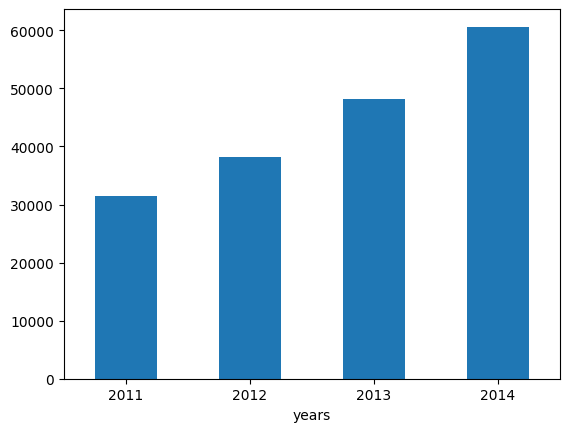

In [47]:
fig, ax = plt.subplots()
qts.plot(kind='bar',x='quantities',y='years',ax=ax)
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.show()

##### ****Sales Quantities have increased in each of the operating years.****

In [48]:
df.groupby(['years','months'])['quantities'].sum().unstack()

months,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
2011,1463,1224,1836,2020,2013,3112,1774,3035,3707,2727,4039,4493
2012,1845,1473,2237,2250,2921,3671,2321,3818,4205,3563,5193,4614
2013,2413,2102,2686,2688,3808,5327,3252,4934,5793,3883,5556,5694
2014,3122,2482,3722,3594,4300,6009,3637,5824,6837,5876,7706,7513


##### ****Sales Quantities vary substantially according to absolute values from month to month.****

In [49]:
curr_qt=df.groupby('years')['quantities'].sum()

In [50]:
prev_qt=curr_qt.shift(1)

In [51]:
Qt_YoY=round((curr_qt-prev_qt)/prev_qt,2)*100

In [52]:
Qt_YoY

years
2011     NaN
2012    21.0
2013    26.0
2014    26.0
Name: quantities, dtype: float64

##### ****Sales Quantities have increased in each of the operating years. The 2014 26% increment is the same as the previous period which is still encouraging but alarming, because it has not exceeded the previous year,which might require further investigation.****

In [53]:
curr_qtm=df.groupby(['years','months'])['quantities'].sum()

In [54]:
prev_qtm=curr_qtm.shift(1)

In [55]:
Qt_MoM=round((curr_qtm-prev_qtm)/prev_qtm,2)*100

In [56]:
Qt_MoM.unstack()

months,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
2011,NaN,-16.0,50.0,10.0,-0.0,55.0,-43.0,71.0,22.0,-26.0,48.0,11.0
2012,-59.0,-20.0,52.0,1.0,30.0,26.0,-37.0,64.0,10.0,-15.0,46.0,-11.0
2013,-48.0,-13.0,28.0,0.0,42.0,40.0,-39.0,52.0,17.0,-33.0,43.0,2.0
2014,-45.0,-20.0,50.0,-3.0,20.0,40.0,-39.0,60.0,17.0,-14.0,31.0,-3.0


##### ****Sales Quantities are very strong in November we can observe that the last 3 years we have enjoyed 40% increments,with only 2014 where there was a decrease to 31% which is also alarming. We also observe that August is a very outstanding Month for quantities sold, as these range between 50 and 70%. In actual fact August seems to be our busiest period in terms of Sales Quantities.****

# Categorical Analysis

In [58]:
df.groupby('ship_mode')['sales'].sum().sort_values(ascending=False)

ship_mode
Standard Class    37084737.84
Second Class      12839527.67
First Class        8728419.94
Same Day           3168587.59
Name: sales, dtype: float64

In [59]:
ship_mode=df.groupby('ship_mode')['sales'].sum().sort_values(ascending=True)

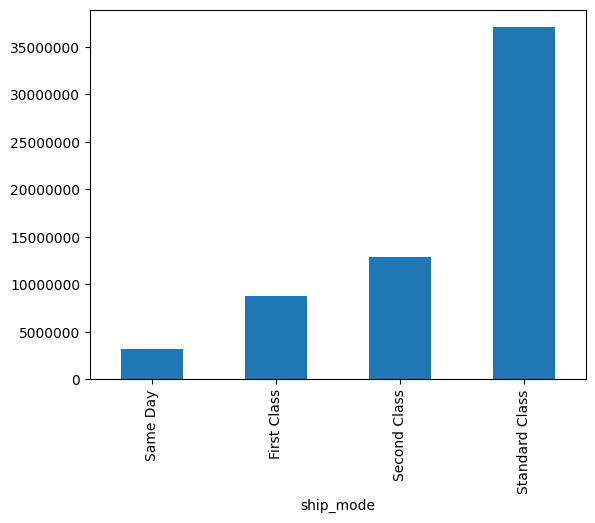

In [60]:
fig, ax = plt.subplots()
ship_mode.plot(kind='bar',x='ship_mode',y='sales',ax=ax)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

##### ****Most of sales are shipped via standard class.****

In [61]:
df.groupby('ship_mode')['quantities'].sum().sort_values(ascending=False)

ship_mode
Standard Class    107319
Second Class       35724
First Class        26039
Same Day            9230
Name: quantities, dtype: int64

In [62]:
ship_qts=df.groupby('ship_mode')['quantities'].sum().sort_values(ascending=False)

##### ****Sales quantities also reflect the same as above.****

In [63]:
df.groupby('ship_mode')['freightcost'].sum().sort_values(ascending=False)

ship_mode
Standard Class    614630.76
Second Class      314112.62
First Class       308103.25
Same Day          115974.06
Name: freightcost, dtype: float64

##### ****Standard class bears the most cost.****

In [64]:
df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).nlargest(30)

customer_name
Tom Ashbrook          226419.38
Greg Tran             216108.51
Christopher Conant    205419.17
Sean Miller           195868.32
Adrian Barton         186818.22
Dave Poirier          182885.76
Harry Greene          179105.81
Peter Fuller          178067.55
Harry Marie           176853.62
Tamara Chand          173255.82
Bill Eplett           171617.29
Dave Brooks           167186.41
Laurel Beltran        166729.83
Daniel Raglin         163807.04
Carol Adams           163413.97
Fred Hopkins          162773.38
Patrick O'Brill       161127.88
Maria Bertelson       160271.02
Vivek Grady           159085.59
Zuschuss Carroll      155694.76
Michael Dominguez     155224.96
Patrick O'Donnell     154859.05
Becky Martin          154247.74
Art Ferguson          152491.54
Jane Waco             151740.20
Susan Pistek          149420.11
Eric Murdock          149367.72
Laura Armstrong       148239.49
Natalie Fritzler      147030.21
Brosina Hoffman       146407.91
Name: sales, dtype: float6

##### ****Top 30 Customers by Sales Value.****

In [65]:
df.groupby('customer_name')['quantities'].sum().sort_values(ascending=False).nlargest(30)

customer_name
Bill Eplett            411
Eric Murdock           392
Steven Ward            383
Gary Hwang             377
John Grady             370
Patrick O'Brill        370
Brosina Hoffman        355
Muhammed Yedwab        351
Eugene Moren           346
Harry Greene           343
Bart Watters           338
Paul Gonzalez          337
Zuschuss Carroll       334
Theresa Coyne          332
Joe Kamberova          330
Shahid Collister       330
Rick Bensley           329
Chloris Kastensmidt    327
Art Ferguson           326
Ted Butterfield        326
Saphhira Shifley       326
Jonathan Doherty       325
Joy Bell-              325
Natalie Fritzler       325
Steven Cartwright      324
Laura Armstrong        323
Phillip Breyer         319
Joe Elijah             319
Irene Maddox           318
Noel Staavos           318
Name: quantities, dtype: int64

In [66]:
cust=df.groupby('customer_name')['quantities'].sum().sort_values(ascending=False).nlargest(30)

##### ****Top 30 Customers by Quantities sold.****

In [67]:
df.groupby('customer_name')['freightcost'].sum().sort_values(ascending=False).nlargest(30)

customer_name
Natalie Fritzler      4127.57
Phillip Breyer        3772.70
John Huston           3629.21
Fred Hopkins          3537.10
Anne McFarland        3404.44
Dave Brooks           3371.94
Joy Bell-             3346.26
Bart Watters          3307.62
Jane Waco             3302.66
Benjamin Patterson    3262.52
Rick Hansen           3260.43
Penelope Sewall       3258.70
Christopher Conant    3252.52
Jason Klamczynski     3210.04
Craig Reiter          3154.14
Laura Armstrong       3150.50
Aaron Bergman         3128.31
Eric Murdock          3127.88
Toby Carlisle         3124.95
John Lee              3081.07
Zuschuss Carroll      3078.82
Muhammed Yedwab       3039.24
Steve Chapman         3019.14
Brad Norvell          3001.36
Greg Tran             2993.29
Rick Wilson           2987.18
Patrick O'Brill       2986.25
Ellis Ballard         2949.33
Mike Pelletier        2933.18
Theone Pippenger      2930.56
Name: freightcost, dtype: float64

##### ****Top 30 Customers by Freight Cost****

In [68]:
df.groupby('segment')['sales'].sum().sort_values(ascending=False)

segment
Consumer       31653338.87
Corporate      18810823.92
Home Office    11357110.25
Name: sales, dtype: float64

##### ****Consumer segment is by far the biggest segment.****

In [69]:
df.groupby('segment')['quantities'].sum().sort_values(ascending=False)

segment
Consumer       92157
Corporate      53565
Home Office    32590
Name: quantities, dtype: int64

##### ****Consumer quantities are far more than any other segment.****

In [70]:
df.groupby('segment')['freightcost'].sum().sort_values(ascending=False)

segment
Consumer       697300.64
Corporate      410474.46
Home Office    245045.59
Name: freightcost, dtype: float64

##### ****Consumer segment also tops the freight cost.****

In [71]:
df.groupby('city')['sales'].sum().sort_values(ascending=False).nlargest(30)

city
New York City    1263477.46
Los Angeles       873209.17
Sydney            609644.62
Manila            600643.15
Seattle           597615.19
Philadelphia      567774.28
San Francisco     541425.56
Mexico City       466306.98
Brisbane          464239.39
Jakarta           442019.88
London            440387.16
Managua           398985.74
Santo Domingo     381327.04
Bangkok           374067.08
Adelaide          362908.18
Melbourne         345271.29
Berlin            345263.97
Gold Coast        340296.90
Paris             318711.15
Perth             308340.39
Houston           306053.29
San Salvador      287704.22
Vienna            286044.57
Detroit           270415.30
San Diego         260573.28
Mixco             255275.26
Madrid            252557.02
Jacksonville      241771.39
Tegucigalpa       237947.36
Springfield       234805.35
Name: sales, dtype: float64

##### ****Top 30 cities by sales value.****

In [72]:
df.groupby('city')['quantities'].sum().sort_values(ascending=False).nlargest(30)

city
New York City       3417
Los Angeles         2879
Philadelphia        1981
San Francisco       1935
Manila              1661
Santo Domingo       1649
Seattle             1590
Houston             1466
Tegucigalpa         1334
Managua             1233
Jakarta             1226
Mexico City         1143
Chicago             1132
Bangkok             1083
London              1033
Sydney               975
Berlin               842
Vienna               840
Columbus             836
Melbourne            813
San Salvador         812
Paris                759
Perth                737
Lagos                733
Gold Coast           728
Buenos Aires         705
Istanbul             700
Brisbane             689
Adelaide             685
Ho Chi Minh City     674
Name: quantities, dtype: int64

##### ****Top 30 cities by sales volume.****

In [73]:
df.groupby('city')['freightcost'].sum().sort_values(ascending=False).nlargest(30)

city
New York City       26948.17
Los Angeles         18777.07
Philadelphia        12080.88
Seattle             11581.45
Manila              11506.06
Sydney              11183.66
San Francisco       10753.24
Jakarta             10735.47
London               9890.22
Managua              9393.94
Santo Domingo        9220.42
Mexico City          8860.27
Gold Coast           8824.94
Brisbane             8405.25
Bangkok              7654.49
Melbourne            7558.13
Adelaide             7351.59
Paris                7155.86
Vienna               7093.83
Perth                6858.28
Houston              6801.75
Berlin               6628.87
San Salvador         5623.04
Ho Chi Minh City     5558.48
Chicago              5524.83
Madrid               5441.87
Newcastle            5335.65
Mixco                5305.68
Tegucigalpa          5174.18
Kinshasa             4856.78
Name: freightcost, dtype: float64

##### ****Top 30 cities by freight cost.****

In [74]:
df.groupby('states')['sales'].sum().sort_values(ascending=False).nlargest(30)

states
England                       2462308.01
California                    2301218.05
Ile-de-France                 1601846.99
New York                      1561073.16
New South Wales               1470646.74
Queensland                    1245180.16
North Rhine-Westphalia        1025072.31
Texas                          834088.02
San Salvador                   768934.64
National Capital               749951.13
Victoria                       731652.81
Washington                     692360.23
Distrito Federal               668013.11
Western Australia              602257.12
Pennsylvania                   602127.36
Provence-Alpes-Côte d'Azur     566776.36
Guatemala                      537763.26
Florida                        472091.22
São Paulo                      471277.16
Maharashtra                    471121.05
Jawa Barat                     470764.47
Guangdong                      467617.68
South Australia                450897.41
Jakarta                        442019.88
Managua  

##### ****Top 30 states by sales value.****

In [75]:
df.groupby('states')['quantities'].sum().sort_values(ascending=False).nlargest(30)

states
California                    7667
England                       5656
New York                      4224
Ile-de-France                 3839
Texas                         3724
New South Wales               2921
Queensland                    2665
North Rhine-Westphalia        2660
San Salvador                  2273
National Capital              2231
Pennsylvania                  2153
Washington                    1883
Illinois                      1845
Victoria                      1801
Distrito Federal              1791
Ohio                          1759
Santo Domingo                 1649
São Paulo                     1530
Provence-Alpes-Côte d'Azur    1463
Guatemala                     1455
Florida                       1379
Managua                       1352
Francisco Morazán             1334
Jakarta                       1226
Panama                        1198
Western Australia             1187
Jawa Barat                    1108
Maharashtra                   1087
Bangkok      

##### ****Top 30 states by sales volume.****

In [76]:
df.groupby('states')['freightcost'].sum().sort_values(ascending=False).nlargest(30)

states
England                       49133.96
California                    48600.58
Ile-de-France                 35528.04
New York                      31960.94
New South Wales               28127.14
Queensland                    27990.10
North Rhine-Westphalia        21252.36
Texas                         17346.40
San Salvador                  15915.12
Victoria                      15150.56
National Capital              14976.90
Distrito Federal              14397.74
Washington                    13679.51
Pennsylvania                  13046.39
Provence-Alpes-Côte d'Azur    12287.56
São Paulo                     11341.26
Maharashtra                   10816.11
Jakarta                       10735.47
Western Australia             10661.21
Guangdong                     10632.30
Guatemala                     10320.31
Jawa Barat                    10019.76
Managua                        9948.93
Ohio                           9882.51
South Australia                9820.89
Santo Domingo     

##### ****Top 30 states by freight cost.****

In [77]:
df.groupby('country')['sales'].sum().sort_values(ascending=False).nlargest(30)

country
United States                       11488062.38
Australia                            4908792.71
France                               4330007.12
China                                3537824.27
Mexico                               3141118.75
Germany                              3054210.98
India                                2922024.03
United Kingdom                       2668916.57
Indonesia                            2036359.39
Brazil                               1762516.84
Spain                                1516261.04
Italy                                1427650.86
Philippines                           914255.03
El Salvador                           877644.03
New Zealand                           795456.79
Cuba                                  742752.89
Nicaragua                             731799.51
Guatemala                             662468.85
Dominican Republic                    608441.28
Japan                                 579973.76
Iran                            

##### ****Top 30 countries by sales value.****

In [78]:
df.groupby('country')['quantities'].sum().sort_values(ascending=False).nlargest(30)

country
United States         37873
France                10804
Australia             10673
Mexico                10011
Germany                7745
China                  7081
United Kingdom         6161
Brazil                 6148
India                  5758
Indonesia              5237
Italy                  4126
Spain                  3240
Turkey                 3024
Dominican Republic     2736
El Salvador            2734
Cuba                   2717
Philippines            2606
Honduras               2556
Nicaragua              2235
New Zealand            2089
Nigeria                2056
Guatemala              1920
Netherlands            1682
Argentina              1504
Panama                 1426
Iran                   1394
Colombia               1277
Austria                1148
Egypt                  1123
Thailand               1110
Name: quantities, dtype: int64

##### ****Top 30 countries by sales volume.****

In [79]:
df.groupby('country')['freightcost'].sum().sort_values(ascending=False).nlargest(30)

country
United States                       238173.79
Australia                           100359.02
France                               95387.81
China                                78957.02
Mexico                               67659.85
Germany                              63965.18
India                                61780.72
United Kingdom                       53580.27
Indonesia                            43948.62
Brazil                               38170.73
Italy                                29970.47
Spain                                29848.09
New Zealand                          19972.34
El Salvador                          18276.06
Philippines                          17882.51
Nicaragua                            17155.51
Cuba                                 16783.65
Dominican Republic                   14588.39
Guatemala                            13181.52
Iran                                 13032.74
South Africa                         11721.21
Turkey                    

##### ****Top 30 countries by freight cost.****

In [80]:
df.groupby(['country','states','city'])['sales'].sum().sort_values(ascending=False).nlargest(30).unstack()

city                                  New York City  Los Angeles     Sydney  \
country            states                                                     
United States      New York              1263477.46          NaN        NaN   
                   California                   NaN    873209.17        NaN   
                   Washington                   NaN          NaN        NaN   
                   Pennsylvania                 NaN          NaN        NaN   
                   Texas                        NaN          NaN        NaN   
                   Michigan                     NaN          NaN        NaN   
                   Illinois                     NaN          NaN        NaN   
Australia          New South Wales              NaN          NaN  609644.62   
                   Queensland                   NaN          NaN        NaN   
                   South Australia              NaN          NaN        NaN   
                   Victoria                     NaN          NaN        NaN   
                   Western Australia            NaN          NaN        NaN   
Philippines        National Capital             NaN          NaN        NaN   
Mexico             Distrito Federal             NaN          NaN        NaN   
Indonesia          Jakarta                      NaN          NaN        NaN   
United Kingdom     England                      NaN          NaN        NaN   
Nicaragua          Managua                      NaN          NaN        NaN   
Dominican Republic Santo Domingo                NaN          NaN        NaN   
Thailand           Bangkok                      NaN          NaN        NaN   
Germany            Berlin                       NaN          NaN        NaN   
France             Ile-de-France                NaN          NaN        NaN   
El Salvador        San Salvador                 NaN          NaN        NaN   
Austria            Vienna                       NaN          NaN        NaN   
Guatemala          Guatemala                    NaN          NaN        NaN   
Spain              Madrid                       NaN          NaN        NaN   
Honduras           Francisco Morazán            NaN          NaN        NaN   
Vietnam            Ho Chí Minh City             NaN          NaN        NaN   

city                                     Manila    Seattle  Philadelphia  \
country            states                                                  
United States      New York                 NaN        NaN           NaN   
                   California               NaN        NaN           NaN   
                   Washington               NaN  597615.19           NaN   
                   Pennsylvania             NaN        NaN     567774.28   
                   Texas                    NaN        NaN           NaN   
                   Michigan                 NaN        NaN           NaN   
                   Illinois                 NaN        NaN           NaN   
Australia          New South Wales          NaN        NaN           NaN   
                   Queensland               NaN        NaN           NaN   
                   South Australia          NaN        NaN           NaN   
                   Victoria                 NaN        NaN           NaN   
                   Western Australia        NaN        NaN           NaN   
Philippines        National Capital   600643.15        NaN           NaN   
Mexico             Distrito Federal         NaN        NaN           NaN   
Indonesia          Jakarta                  NaN        NaN           NaN   
United Kingdom     England                  NaN        NaN           NaN   
Nicaragua          Managua                  NaN        NaN           NaN   
Dominican Republic Santo Domingo            NaN        NaN           NaN   
Thailand           Bangkok                  NaN        NaN           NaN   
Germany            Berlin                   NaN        NaN           NaN   
France             Ile-de-France    

##### ****Leading country by sales value is the USA, New York state and New York city being the leader by sales value. In Australia, the state of New South Wales is the leading state and city being Sydney.****

In [81]:
df.groupby(['country','states','city'])['quantities'].sum().sort_values(ascending=False).nlargest(30).unstack()

city                                  New York City  Los Angeles  \
country            states                                          
United States      New York                  3417.0          NaN   
                   California                   NaN       2879.0   
                   Pennsylvania                 NaN          NaN   
                   Washington                   NaN          NaN   
                   Texas                        NaN          NaN   
                   Illinois                     NaN          NaN   
Philippines        National Capital             NaN          NaN   
Dominican Republic Santo Domingo                NaN          NaN   
Honduras           Francisco Morazán            NaN          NaN   
Nicaragua          Managua                      NaN          NaN   
Indonesia          Jakarta                      NaN          NaN   
Mexico             Distrito Federal             NaN          NaN   
Thailand           Bangkok                      NaN          NaN   
United Kingdom     England                      NaN          NaN   
Australia          New South Wales              NaN          NaN   
                   Victoria                     NaN          NaN   
                   Western Australia            NaN          NaN   
                   Queensland                   NaN          NaN   
                   South Australia              NaN          NaN   
Germany            Berlin                       NaN          NaN   
Austria            Vienna                       NaN          NaN   
El Salvador        San Salvador                 NaN          NaN   
France             Ile-de-France                NaN          NaN   
Nigeria            Lagos                        NaN          NaN   
Argentina          Buenos Aires                 NaN          NaN   
Turkey             Istanbul                     NaN          NaN   
Vietnam            Ho Chí Minh City             NaN          NaN   

city                                  Philadelphia  San Francisco  Manila  \
country            states                                                   
United States      New York                    NaN            NaN     NaN   
                   California                  NaN         1935.0     NaN   
                   Pennsylvania             1981.0            NaN     NaN   
                   Washington                  NaN            NaN     NaN   
                   Texas                       NaN            NaN     NaN   
                   Illinois                    NaN            NaN     NaN   
Philippines        National Capital            NaN            NaN  1661.0   
Dominican Republic Santo Domingo               NaN            NaN     NaN   
Honduras           Francisco Morazán           NaN            NaN     NaN   
Nicaragua          Managua                     NaN            NaN     NaN   
Indonesia          Jakarta                     NaN            NaN     NaN   
Mexico             Distrito Federal            NaN            NaN     NaN   
Thailand           Bangkok                     NaN            NaN     NaN   
United Kingdom     England                     NaN            NaN     NaN   
Australia          New South Wales             NaN            NaN     NaN   
                   Victoria                    NaN            NaN     NaN   
                   Western Australia           NaN            NaN     NaN   
                   Queensland                  NaN            NaN     NaN   
                   South Australia             NaN            NaN     NaN   
Germany            Berlin                      NaN            NaN     NaN   
Austria            Vienna                      NaN            NaN     NaN   
El Salvador        San Salvador                NaN            NaN     NaN   
France             Ile-de-France               NaN            NaN     NaN   
Nigeria            Lagos                       NaN            NaN     NaN   
Argentina          Buenos

##### ****Leading country by sales volume is the USA, New York state and New York city being the leader. In second is the Philippines, the state of National Capital is the leading state and city being Manila.****

In [82]:
df.groupby(['country','states','city'])['freightcost'].sum().sort_values(ascending=False).nlargest(30).unstack()

city                                                New York City  \
country                          states                             
United States                    New York                26948.17   
                                 California                   NaN   
                                 Pennsylvania                 NaN   
                                 Washington                   NaN   
                                 Texas                        NaN   
                                 Illinois                     NaN   
Philippines                      National Capital             NaN   
Australia                        New South Wales              NaN   
                                 Queensland                   NaN   
                                 Victoria                     NaN   
                                 South Australia              NaN   
                                 Western Australia            NaN   
Indonesia                        Jakarta                      NaN   
United Kingdom                   England                      NaN   
Nicaragua                        Managua                      NaN   
Dominican Republic               Santo Domingo                NaN   
Mexico                           Distrito Federal             NaN   
Thailand                         Bangkok                      NaN   
France                           Ile-de-France                NaN   
Austria                          Vienna                       NaN   
Germany                          Berlin                       NaN   
El Salvador                      San Salvador                 NaN   
Vietnam                          Ho Chí Minh City             NaN   
Spain                            Madrid                       NaN   
Guatemala                        Guatemala                    NaN   
Honduras                         Francisco Morazán            NaN   
Democratic Republic of the Congo Kinshasa                     NaN   

city                                                Los Angeles  Philadelphia  \
country                          states                                         
United States                    New York                   NaN           NaN   
                                 California            18777.07           NaN   
                                 Pennsylvania               NaN      12080.88   
                                 Washington                 NaN           NaN   
                                 Texas                      NaN           NaN   
                                 Illinois                   NaN           NaN   
Philippines                      National Capital           NaN           NaN   
Australia                        New South Wales            NaN           NaN   
                                 Queensland                 NaN           NaN   
                                 Victoria                   NaN           NaN   
                                 South Australia            NaN           NaN   
                                 Western Australia          NaN           NaN   
Indonesia                        Jakarta                    NaN           NaN   
United Kingdom                   England                    NaN           NaN   
Nicaragua                        Managua                    NaN           NaN   
Dominican Republic               Santo Domingo              NaN           NaN   
Mexico                           Distrito Federal           NaN           NaN   
Thailand                         Bangkok                    NaN           NaN   
France                           Ile-de-France              NaN           NaN   
Austria                          Vienna                     NaN           NaN   
Germany                          Berlin                     NaN           NaN   
El Salvador                      San Salvador               NaN           NaN   
Vietnam                          Ho Chí Minh City     

##### ****There is no suprise in this regard because the countries which were 1st and 2nd in the previous metric share the same spots in this metric.****

In [83]:
df.groupby('markets')['sales'].sum().sort_values(ascending=False)

markets
APAC      18257697.69
EU        14793558.08
US        11488062.38
LATAM     10597086.35
EMEA       3317421.42
Africa     3130177.69
Canada      237269.43
Name: sales, dtype: float64

##### ****Asia Pacific is the leading market in terms of sales value.****

In [84]:
df.groupby('markets')['quantities'].sum().sort_values(ascending=False)

markets
APAC      41226
LATAM     38526
US        37873
EU        37773
EMEA      11517
Africa    10564
Canada      833
Name: quantities, dtype: int64

##### ****Asia Pacific also leads by sales volume.****

In [85]:
df.groupby('markets')['freightcost'].sum().sort_values(ascending=False)

markets
APAC      387165.11
EU        309422.35
US        238173.79
LATAM     234138.61
EMEA       88375.73
Africa     88139.47
Canada      7405.63
Name: freightcost, dtype: float64

##### ****Same as the previous two metrics.****

In [86]:
df.groupby(['markets','country','states','city'])['sales'].sum().sort_values(ascending=False).nlargest(30).unstack()

city                                          New York City  Los Angeles  \
markets country            states                                          
US      United States      New York              1263477.46          NaN   
                           California                   NaN    873209.17   
                           Washington                   NaN          NaN   
                           Pennsylvania                 NaN          NaN   
                           Texas                        NaN          NaN   
                           Michigan                     NaN          NaN   
                           Illinois                     NaN          NaN   
APAC    Australia          New South Wales              NaN          NaN   
                           Queensland                   NaN          NaN   
                           South Australia              NaN          NaN   
                           Victoria                     NaN          NaN   
                           Western Australia            NaN          NaN   
        Philippines        National Capital             NaN          NaN   
        Indonesia          Jakarta                      NaN          NaN   
        Thailand           Bangkok                      NaN          NaN   
        Vietnam            Ho Chí Minh City             NaN          NaN   
LATAM   Mexico             Distrito Federal             NaN          NaN   
        Nicaragua          Managua                      NaN          NaN   
        Dominican Republic Santo Domingo                NaN          NaN   
        El Salvador        San Salvador                 NaN          NaN   
        Guatemala          Guatemala                    NaN          NaN   
        Honduras           Francisco Morazán            NaN          NaN   
EU      United Kingdom     England                      NaN          NaN   
        Germany            Berlin                       NaN          NaN   
        France             Ile-de-France                NaN          NaN   
        Austria            Vienna                       NaN          NaN   
        Spain              Madrid                       NaN          NaN   

city                                             Sydney     Manila    Seattle  \
markets country            states                                               
US      United States      New York                 NaN        NaN        NaN   
                           California               NaN        NaN        NaN   
                           Washington               NaN        NaN  597615.19   
                           Pennsylvania             NaN        NaN        NaN   
                           Texas                    NaN        NaN        NaN   
                           Michigan                 NaN        NaN        NaN   
                           Illinois                 NaN        NaN        NaN   
APAC    Australia          New South Wales    609644.62        NaN        NaN   
                           Queensland               NaN        NaN        NaN   
                           South Australia          NaN        NaN        NaN   
                           Victoria                 NaN        NaN        NaN   
                           Western Australia        NaN        NaN        NaN   
        Philippines        National Capital         NaN  600643.15        NaN   
        Indonesia          Jakarta                  NaN        NaN        NaN   
        Thailand           Bangkok                  NaN        NaN        NaN   
        Vietnam            Ho Chí Minh City         NaN        NaN        NaN   
LATAM   Mexico             Distrito Federal         NaN        NaN        NaN   
        Nicaragua          Managua                  NaN        NaN        NaN   
        Dominican Republic Santo Domingo            NaN        NaN        NaN   
        El Salvador        San Salvador             NaN        NaN        NaN   
        Guate

##### ****We observe a somewhat different pattern when we include countries the biggest market is the USA,followed by Asia Pacific.****

In [87]:
df.groupby('regions')['sales'].sum().sort_values(ascending=False)

regions
Central           14026849.12
South              8066654.37
North              6277742.71
Oceania            5715188.79
Southeast Asia     4373364.15
North Asia         4326464.59
Central Asia       3842680.16
West               3595227.46
East               3379326.74
EMEA               3317421.42
Africa             3130177.69
Caribbean          1532906.41
Canada              237269.43
Name: sales, dtype: float64

##### ****Leading region by far is the Central region by sales value.****

In [88]:
df.groupby('regions')['quantities'].sum().sort_values(ascending=False)

regions
Central           41762
South             25206
North             18021
Oceania           12838
West              12266
Southeast Asia    11822
EMEA              11517
East              10618
Africa            10564
North Asia         8851
Central Asia       7715
Caribbean          6299
Canada              833
Name: quantities, dtype: int64

##### ****The Central region also leads by sales volume.****

In [89]:
df.groupby('regions')['freightcost'].sum().sort_values(ascending=False)

regions
Central           296940.56
South             168474.07
North             131474.09
Oceania           120628.51
North Asia         95030.61
Southeast Asia     93675.84
EMEA               88375.73
Africa             88139.47
Central Asia       77830.15
West               76512.26
East               72743.62
Caribbean          35590.15
Canada              7405.63
Name: freightcost, dtype: float64

##### ****The central region also leads by freight cost.****

In [90]:
df.groupby(['regions','country','states','city'])['sales'].sum().sort_values(ascending=False).nlargest(30).unstack()

city                                                 New York City  \
regions        country            states                             
East           United States      New York              1263477.46   
                                  Pennsylvania                 NaN   
West           United States      California                   NaN   
                                  Washington                   NaN   
Oceania        Australia          New South Wales              NaN   
                                  Queensland                   NaN   
                                  South Australia              NaN   
                                  Victoria                     NaN   
                                  Western Australia            NaN   
Southeast Asia Philippines        National Capital             NaN   
               Indonesia          Jakarta                      NaN   
               Thailand           Bangkok                      NaN   
               Vietnam            Ho Chí Minh City             NaN   
North          Mexico             Distrito Federal             NaN   
               United Kingdom     England                      NaN   
Central        United States      Texas                        NaN   
                                  Michigan                     NaN   
                                  Illinois                     NaN   
               Nicaragua          Managua                      NaN   
               Germany            Berlin                       NaN   
               France             Ile-de-France                NaN   
               El Salvador        San Salvador                 NaN   
               Austria            Vienna                       NaN   
               Guatemala          Guatemala                    NaN   
               Honduras           Francisco Morazán            NaN   
Caribbean      Dominican Republic Santo Domingo                NaN   
South          Spain              Madrid                       NaN   

city                                                 Los Angeles     Sydney  \
regions        country            states                                      
East           United States      New York                   NaN        NaN   
                                  Pennsylvania               NaN        NaN   
West           United States      California           873209.17        NaN   
                                  Washington                 NaN        NaN   
Oceania        Australia          New South Wales            NaN  609644.62   
                                  Queensland                 NaN        NaN   
                                  South Australia            NaN        NaN   
                                  Victoria                   NaN        NaN   
                                  Western Australia          NaN        NaN   
Southeast Asia Philippines        National Capital           NaN        NaN   
               Indonesia          Jakarta                    NaN        NaN   
               Thailand           Bangkok                    NaN        NaN   
               Vietnam            Ho Chí Minh City           NaN        NaN   
North          Mexico             Distrito Federal           NaN        NaN   
               United Kingdom     England                    NaN        NaN   
Central        United States      Texas                      NaN        NaN   
                                  Michigan                   NaN        NaN   
                                  Illinois                   NaN        NaN   
               Nicaragua          Managua                    NaN        NaN   
               Germany            Berlin                     NaN        NaN   
               France             Ile-de-France              NaN        NaN   
               El Salvador        San Salvador               NaN        NaN   
               Austria            Vienna                     NaN        N

##### ****When we include countries we observe that the Eastern region of the USA,which is New York is the leading region.****

In [91]:
df.groupby(['regions'])['markets'].nunique().sort_values(ascending=False)

regions
Central           3
South             3
North             2
Africa            1
Canada            1
Central Asia      1
Caribbean         1
East              1
EMEA              1
North Asia        1
Oceania           1
Southeast Asia    1
West              1
Name: markets, dtype: int64

In [92]:
df.groupby(['regions'])['country'].nunique().sort_values(ascending=False)

regions
Africa            45
EMEA              40
South             14
Central           12
Caribbean          8
Southeast Asia     8
North              7
North Asia         6
Central Asia       6
Oceania            3
Canada             1
East               1
West               1
Name: country, dtype: int64

In [93]:
df.groupby(['regions'])['states'].nunique().sort_values(ascending=False)

regions
EMEA              289
Africa            228
South             183
Central           108
North Asia         69
North              57
Southeast Asia     48
Central Asia       40
Caribbean          35
Oceania            23
East               14
West               11
Canada              8
Name: states, dtype: int64

In [94]:
df.groupby(['regions'])['city'].nunique().sort_values(ascending=False)

regions
Central           872
South             770
EMEA              449
North             323
Africa            316
North Asia        308
Central Asia      173
West              169
East              108
Oceania            93
Southeast Asia     82
Canada             46
Caribbean          44
Name: city, dtype: int64

In [95]:
df.groupby(['markets'])['country'].nunique().sort_values(ascending=False)

markets
Africa    45
EMEA      40
LATAM     24
APAC      23
EU        15
Canada     1
US         1
Name: country, dtype: int64

In [96]:
df.groupby(['markets'])['states'].nunique().sort_values(ascending=False)

markets
EMEA      289
Africa    228
LATAM     219
APAC      179
EU        137
US         49
Canada      8
Name: states, dtype: int64

In [97]:
df.groupby(['markets'])['city'].nunique().sort_values(ascending=False)

markets
EU        1069
APAC       656
LATAM      635
US         531
EMEA       449
Africa     316
Canada      46
Name: city, dtype: int64

In [98]:
df.groupby('categories')['sub_categories'].unique()

categories
Furniture                   [Chairs, Tables, Bookcases, Furnishings]
Office Supplies    [Binders, Supplies, Appliances, Storage, Art, ...
Technology                  [Accessories, Phones, Copiers, Machines]
Name: sub_categories, dtype: object

In [99]:
df.groupby('categories')['sub_categories'].nunique()

categories
Furniture          4
Office Supplies    9
Technology         4
Name: sub_categories, dtype: int64

In [100]:
df.groupby('categories')['sales'].sum().sort_values(ascending=False)

categories
Technology         23047290.82
Furniture          20088680.44
Office Supplies    18685301.78
Name: sales, dtype: float64

##### ****Technology is the leading category by sales value.****

In [101]:
df.groupby('categories')['quantities'].sum().sort_values(ascending=False)

categories
Office Supplies    108182
Technology          35176
Furniture           34954
Name: quantities, dtype: int64

##### ****Office supplies are leading by sales volume.****

In [102]:
df.groupby('categories')['freightcost'].sum().sort_values(ascending=False)

categories
Technology         507048.74
Furniture          440320.66
Office Supplies    405451.29
Name: freightcost, dtype: float64

##### ****Technology is the leader by freight cost.****

In [103]:
df.groupby(['categories','sub_categories'])['sales'].sum().sort_values(ascending=False).unstack()

sub_categories,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
categories,,,,,,,,,,,,,,,,,
Furniture,NaN,NaN,NaN,NaN,7061787.75,7446715.53,NaN,NaN,NaN,1923668.95,NaN,NaN,NaN,NaN,NaN,NaN,3656508.21
Office Supplies,NaN,5029154.37,1825377.85,2289169.7,NaN,NaN,NaN,837352.68,407746.62,NaN,379911.82,NaN,1239769.93,NaN,5486168.87,1190649.94,NaN
Technology,3805274.95,NaN,NaN,NaN,NaN,NaN,7174849.55,NaN,NaN,NaN,NaN,3665046.36,NaN,8402119.96,NaN,NaN,NaN


##### ****In furniture sales chairs are the leading subcategory,In office supplies the top seller is storage and finally in Technology the Phones are the leading sub category by sales value. Overall the phones are leading by sales value.****

In [104]:
df.groupby(['categories','sub_categories'])['quantities'].sum().sort_values(ascending=False).unstack()

sub_categories,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
categories,,,,,,,,,,,,,,,,,
Furniture,NaN,NaN,NaN,NaN,8310.0,12336.0,NaN,NaN,NaN,11225.0,NaN,NaN,NaN,NaN,NaN,NaN,3083.0
Office Supplies,NaN,6078.0,16301.0,21429.0,NaN,NaN,NaN,8380.0,8390.0,NaN,9322.0,NaN,12822.0,NaN,16917.0,8543.0,NaN
Technology,10946.0,NaN,NaN,NaN,NaN,NaN,7454.0,NaN,NaN,NaN,NaN,4906.0,NaN,11870.0,NaN,NaN,NaN


##### ****In furniture sales chairs are the leading subcategory,In office supplies the top seller are Binders and finally in Technology the Phones are the leading sub category by sales volume. Overall the Binders are leading by sales volume.****

In [105]:
df.groupby(['product_name'])['sales'].sum().sort_values(ascending=False).nlargest(30)

product_name
Apple Smart Phone, Full Size                                432251.62
Motorola Smart Phone, Full Size                             383074.48
Cisco Smart Phone, Full Size                                377353.41
Nokia Smart Phone, Full Size                                297163.14
Hon Executive Leather Armchair, Adjustable                  295439.41
Samsung Smart Phone, VoIP                                   280221.34
Canon imageCLASS 2200 Advanced Copier                       253399.30
SAFCO Executive Leather Armchair, Black                     253072.71
Samsung Smart Phone, Cordless                               245073.54
Nokia Smart Phone, with Caller ID                           244862.31
Sauder Classic Bookcase, Traditional                        238195.82
Harbour Creations Executive Leather Armchair, Adjustable    236261.82
Hoover Stove, Red                                           232447.36
Cisco Smart Phone, Cordless                                 196573.17
Office 

#### ***Top 30 products by sales value.***